In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-malwares/ClaMP_Integrated-5184.csv
/kaggle/input/classification-of-malwares/ClaMP_Raw-5184.csv


# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import train_test_split
import imblearn #Major library - Please ensure this is installed
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

#-------------------------------------------------------------------
import statsmodels #Install if not present readily
import xgboost as xgb
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")


random.seed(100)

# Importing Dataset for classification and subsequent explainability exploration
Links - https://www.kaggle.com/saurabhshahane/classification-of-malwares

In [3]:
dataset = pd.read_csv(r"../input/classification-of-malwares/ClaMP_Integrated-5184.csv")

#------------------------------------------------------------------------------------------------
#Summary
print('Total Shape :',dataset.shape)
dataset.head()

Total Shape : (5210, 70)


,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4,FH_char5,FH_char6,FH_char7,FH_char8,FH_char9,FH_char10,FH_char11,FH_char12,FH_char13,FH_char14,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,OH_DLLchar0,OH_DLLchar1,OH_DLLchar2,OH_DLLchar3,OH_DLLchar4,OH_DLLchar5,OH_DLLchar6,OH_DLLchar7,OH_DLLchar8,OH_DLLchar9,OH_DLLchar10,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,8,0,1100288,225792,0,1069880,4096,1110016,0,1,1,4,0,0,0,5,1,1,1,1194954,3,1,0,0,0,0,0,0,0,0,0,0,1048576,4096,1048576,4096,1,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,5,10,4096,2560,0,7680,4096,8192,1,1,1,4,0,0,0,4,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1048576,4096,1048576,4096,1,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,9,0,27648,20480,0,28859,4096,32768,1,1,1,5,0,0,0,5,0,1,1,67688,2,1,0,1,0,0,0,0,0,0,0,0,1048576,4096,1048576,4096,1,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,9,0,0,87552,0,0,4096,4096,1,1,1,6,1,6,1,5,0,1,1,113668,2,1,0,1,0,1,0,0,0,0,0,0,1048576,4096,1048576,4096,1,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,10,10,11776,36352,0,13379,4096,16384,1,1,1,6,2,6,2,6,2,1,1,69089,2,1,0,1,0,0,0,0,1,0,0,0,262144,8192,1048576,4096,1,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


# Checking null values in the dataset (No null found)

In [4]:
pd.DataFrame(dataset.isnull().sum()).T

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4,FH_char5,FH_char6,FH_char7,FH_char8,FH_char9,FH_char10,FH_char11,FH_char12,FH_char13,FH_char14,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,OH_DLLchar0,OH_DLLchar1,OH_DLLchar2,OH_DLLchar3,OH_DLLchar4,OH_DLLchar5,OH_DLLchar6,OH_DLLchar7,OH_DLLchar8,OH_DLLchar9,OH_DLLchar10,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Checking the total Benign vs Malware Class Ratio (approximately 1:1)

In [5]:
dataset['class'].value_counts()

1    2722
0    2488
Name: class, dtype: int64

# Checking the non-numerical features to convert into numerical format 

In [6]:
type_df = pd.DataFrame(dataset.dtypes).reset_index()
type_df.columns=['cols','type']
type_df[type_df['type']=='object']['cols'].unique()

array(['packer_type'], dtype=object)

#### Hence, 'packer_type' feature has to be reformatted into numerical feature

In [7]:
print('Total unique values in "packer_type":',dataset['packer_type'].nunique())

Total unique values in "packer_type": 40


# Since this feature consists of levels which are nominal in nature (cannot be sorted in a logical way), we will use One-Hot Encoding 

In [8]:
#Extracting the required levels only, based on value counts. 
packer_unique_df = pd.DataFrame(dataset['packer_type'].value_counts()).reset_index()
packer_unique_df.columns = ['packer_type','unique_count']
catg = packer_unique_df[packer_unique_df['unique_count']>10]['packer_type'].unique()

### One-Hot encoding

In [9]:
encoded = pd.get_dummies(dataset['packer_type'])
encoded = encoded[[col for col in list(encoded.columns) if col in catg]]
print('Shape of encode :',encoded.shape)
#----------------------------------------------------------------------
#Concatenating the encoded columns
if set(catg).issubset(set(dataset.columns))==False: #Conditional automation 
    dataset = pd.concat([dataset,encoded],axis=1)
    dataset.drop(columns='packer_type',inplace=True)

dataset.shape

Shape of encode : (5210, 9)


(5210, 78)

# Splitting the data into X and Y for modelling purpose

In [10]:
from sklearn.preprocessing import StandardScaler

# Test Train Split for modelling purpose
X = dataset.loc[:,[cols for cols in dataset.columns if ('class' not in cols)]] #Removing time since its a level column
y = dataset.loc[:,[cols for cols in dataset.columns if 'class' in cols]]

#----------------------------------------------------------------------------------------------------
#Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=100)

#----------------------------------------------------------------------------------------------------
print('Total Shape of Train X:',X_train.shape)
print('Total Shape of Train Y:',y_train.shape)
print('Total Shape of Test X:',X_test.shape)

Total Shape of Train X: (3490, 77)
Total Shape of Train Y: (3490, 1)
Total Shape of Test X: (1720, 77)


# Using Random Forest Classifier with default hyperparameters 

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)
#-----------------------------------------------
score = roc_auc_score(y_test, rf_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, rf_pred))
print('3. Classification Report -\n',classification_report(y_test, rf_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, rf_pred))

1. ROC AUC: 0.993
2. Accuracy : 0.9930232558139535
3. Classification Report -
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       821
           1       0.99      0.99      0.99       899

    accuracy                           0.99      1720
   macro avg       0.99      0.99      0.99      1720
weighted avg       0.99      0.99      0.99      1720

4. Confusion Matrix - 
 [[814   7]
 [  5 894]]


In [12]:
X_test_df = pd.DataFrame(X_test).reset_index(drop=True)
X_test_df.columns = [cols for cols in dataset.columns if ('class' not in cols)]

# Insights : 
1. The predictions seem to be very accurate, but there are FN an FP cases which can be further explored
2. Due to high accuracy of the classifier, we will hav to see the tendency of the model on how it predicts across some features and which features have been mostly influential in getting us such good accuracy scores
3. Similar study can be performed for scenarios where the accuracy /metric i not very good and we want to check which feature is causing the classifier to not learn properly and remediate that if possible

### Additional Note : 
1. All the explainability techniques tried down below in no way describe actual causality between the feature and the prediction/target variable
2. The patterns observed are a mirror image of what the model has learnt, rather than the actual relationship. Hence,any unclear or counter-intuitive pattern observed can be blamed on the quality of the model
3. A ML model might perform very good, but there is a need to understand the prediction explainability because it should not be counter-intuitve to what a subject matter expert (SME) might interpret from raw data

# Explainability of ML models:
1. Since many ML models used like the one above are black-box models, i.e one cannot have an intuitive explanation of how the model arrived at that certain prediction, we use a family of techniques known as ML Explainability techniques
2. These consist of the following :
    - Permutation Importance
    - Individual Contribution Expectation (ICE Plots)
    - Partial Dependency Plots (PD Plots)
    - Acumulated Local Effects (ALE Plots)
    - SHApely exPlanations (SHAP analysis) 

# Permutation Importance
Relevant Links: https://christophm.github.io/interpretable-ml-book/feature-importance.html


In [13]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_clf, scoring='accuracy',random_state=100).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = [cols for cols in dataset.columns if ('class' not in cols)])

Weight,Feature
0.0419 ± 0.0052,FH_char12
0.0129 ± 0.0020,Subsystem
0.0108 ± 0.0031,CheckSum
0.0076 ± 0.0013,filesize
0.0044 ± 0.0036,AddressOfEntryPoint
0.0044 ± 0.0019,E_data
0.0031 ± 0.0016,fileinfo
0.0027 ± 0.0045,E_file
0.0023 ± 0.0021,OH_DLLchar0
0.0023 ± 0.0015,sus_sections


### Insights : We can see from above that for the estimator, "FH_char12" is the most important criteria for accuracy in the test data followed by "Subsystem". We'll explore these two features further in detail 

# Partial Dependency (PD) Plots & Individual Contribution Expectation (ICE) plots:
1. They give a permuted representation of the effect of each value of the concerned variable on the output (prediction) of the model
2. They are prone to severe bias and mis-representation if multi-collinearity is present between the features of the model
3. PD plots are the averaged out representation of all ICE points for a given value of the concerned variable (Hence, ALE plots are used)
3. Relevant Links: https://christophm.github.io/interpretable-ml-book/pdp.html

<Figure size 5760x5760 with 0 Axes>

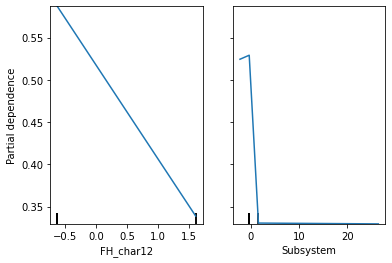

In [14]:
from sklearn.inspection import plot_partial_dependence

#------------------------------------------------------------------------------------------
# specifying the fig size
fig = plt.figure(figsize=(80, 80))
plot_partial_dependence(estimator=rf_clf,X=X_test_df,features=['FH_char12','Subsystem'],n_jobs=-1)
plt.show()

# Insights : 
1. For "FH_char12" feature, the tendency to predict higher proabability(class 1) is higher in the extreme starting points only, after it the partial dependence decreases to the next value
2. For "Subsystem", similar hike in inital points is followed by a steep drop in partial dependence and then it flatlines at some average value
3. The ICE plot can be plotted with the addition of an argument "kind='both'" in the above line of code (Only available in sklearn v0.24 onwards)

# Accumulated Local Effects (ALE)
1. Is robust to the assumptions of multi-collinearity as it permutes only in the conditional space of predictors, rather than the whole predictor space
2. Relevant Links: https://christophm.github.io/interpretable-ml-book/ale.html

In [15]:
#conda install -c conda-forge PyALE
!pip install PyALE

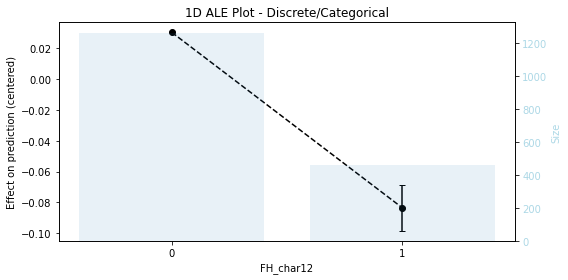

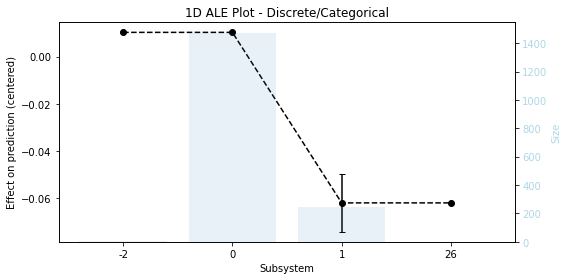

In [16]:
from PyALE import ale

#-------------------------------------------------------------------------------------------------
def ALE_plot(feature_,df,est):
  df_temp = df.copy()
  df_temp[feature_] = df_temp[feature_].astype(int)
  ale_eff = ale(X=df_temp, model=est, feature=[feature_], grid_size=25, include_CI=True, C=0.95)
  del df_temp
    
#-------------------------------------------------------------------------------------------------
ALE_plot('FH_char12',X_test_df,rf_clf)
ALE_plot('Subsystem',X_test_df,rf_clf)

### Insights : 
1. The behavior of both the features are quite similar to what was observed in PD Plots, though we can see that the ALE plots are correctly considering these features as discrete/categorical (2 & 4 unique values are present for each of the columns respectively)

# Shapely Additive exPlanations (SHAP) Analysis 
Relevant Links:
1. https://christophm.github.io/interpretable-ml-book/shap.html
2. https://github.com/slundberg/shap

In [17]:
import shap

shap.initjs()

def SHAP_generator(data_for_prediction,train_data,est):
  #-------------------------------------------------------------------------------------------
  #Passing required X data for SHAP analysis
  data_for_prediction = data_for_prediction #Change data here

  # Create object that can calculate shap values
  explainer = shap.TreeExplainer(est,data=train_data,model_output="probability") #Used for tree based model, 
                                                                                #for other models use Kernel Explainer
                                                                                #as explained in the above links

  # Calculate Shap values
  shap_values = explainer.shap_values(data_for_prediction)

  return explainer,shap_values

#----------------------------------------------------------------------------------------------
#Calculating the SHAP values by invoking the UDF
explainer,shap_values = SHAP_generator(X_test,X_train,rf_clf) #High Runtime 

 98%|===================| 3383/3440 [00:58<00:00]       

In [18]:
#Qcing the shape of the output array with shap values - it should match with the shape of the test dataset
print(X_test.shape)
print(shap_values[0].shape)
#shap_values[0:3]

(1720, 77)
(1720, 77)


### Overall SHAP summary (Works like feature importance as well)

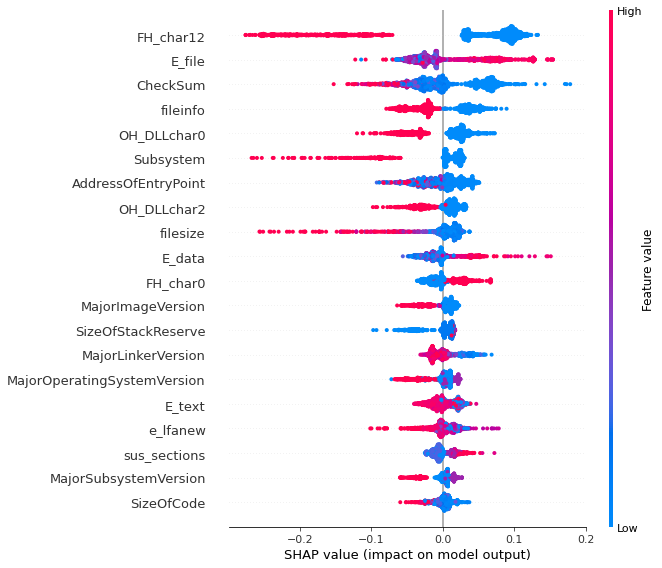

In [19]:
shap.summary_plot(shap_values[1], X_test,feature_names=[cols for cols in dataset.columns if ('class' not in cols)]) 

#### Insights :
1. Features FH_char12, E_file and CheckSum are the top 3 features according to their contribution to the whole predictions
2. For FH_char12, lower the valus, higher the tendency to predict 1s can be inferred out from the above chart, which is waht we saw in PD plots as well. Hence the techniques are consistent here

### Individual record level SHAP view (to pin-point on FPs and FNs)

#### Finding the FP and FN rows in the test dataset to explore which featurs led to them being mislabelled

In [20]:
print('#------- Indexes of FNs from the test data :\n')
print(np.where((np.array(rf_pred).ravel()==0) & (np.array(y_test).ravel()==1)),'\n')

print('#------- Indexes of FPs from the test data :\n')
print(np.where((np.array(rf_pred).ravel()==1) & (np.array(y_test).ravel()==0)),'\n')

#------- Indexes of FNs from the test data :

(array([  51,  169,  476,  879, 1564]),) 

#------- Indexes of FPs from the test data :

(array([ 634,  662, 1074, 1410, 1587, 1614, 1665]),) 



In [21]:
shap.initjs()

idx = 1665

print('Probability obtained :',rf_pred_proba[idx][1])
shap.force_plot(explainer.expected_value[1], shap_values[1][idx,:], X_test[idx], feature_names=[cols for cols in dataset.columns if ('class' not in cols)])

Probability obtained : 0.83


### Insights : 
1. For majority of FNs, and FPs 'FH_char12' has been the most important driving driving point which has come out in other methods as well

## Tips on using Explainability Tools/Techniques like above:
1. These plots and results should be interpreted with caution, as the risk of misinterpreting is very high
2. The interpratation of these plots and results should be with the business stakeholder/ Subject Matter Experts(SME)
3. The results do not in any way indicate causality in the real world. It is just the representation of the predictions on the test data. If the test data is not random/mixture enough, the results might come out biased 

# END